In [152]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\A393350\Desklocalhost:8888/notebooks/Desktop/Kaggle/AceaSmartWaterAnalytics/notebookDada.ipynbtop\Kaggle\AceaSmartWaterAnalytics\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [153]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore
import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_csv(r"C:\Users\A393350\Desktop\Kaggle\AceaSmartWaterAnalytics\data/Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [155]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [156]:
print('The earliest date: \t%s' %df['Date'].values[[0, -1]][0])
print('The latest date: \t%s' %df['Date'].values[[0, -1]][1])
print(df.shape)

The earliest date: 	2006-03-14T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(5223, 8)


In [157]:
feature_col=list(df.columns[1:])
feature_col

['Rainfall_Bastia_Umbra',
 'Depth_to_Groundwater_P24',
 'Depth_to_Groundwater_P25',
 'Temperature_Bastia_Umbra',
 'Temperature_Petrignano',
 'Volume_C10_Petrignano',
 'Hydrometry_Fiume_Chiascio_Petrignano']

# 1. Data Visualization

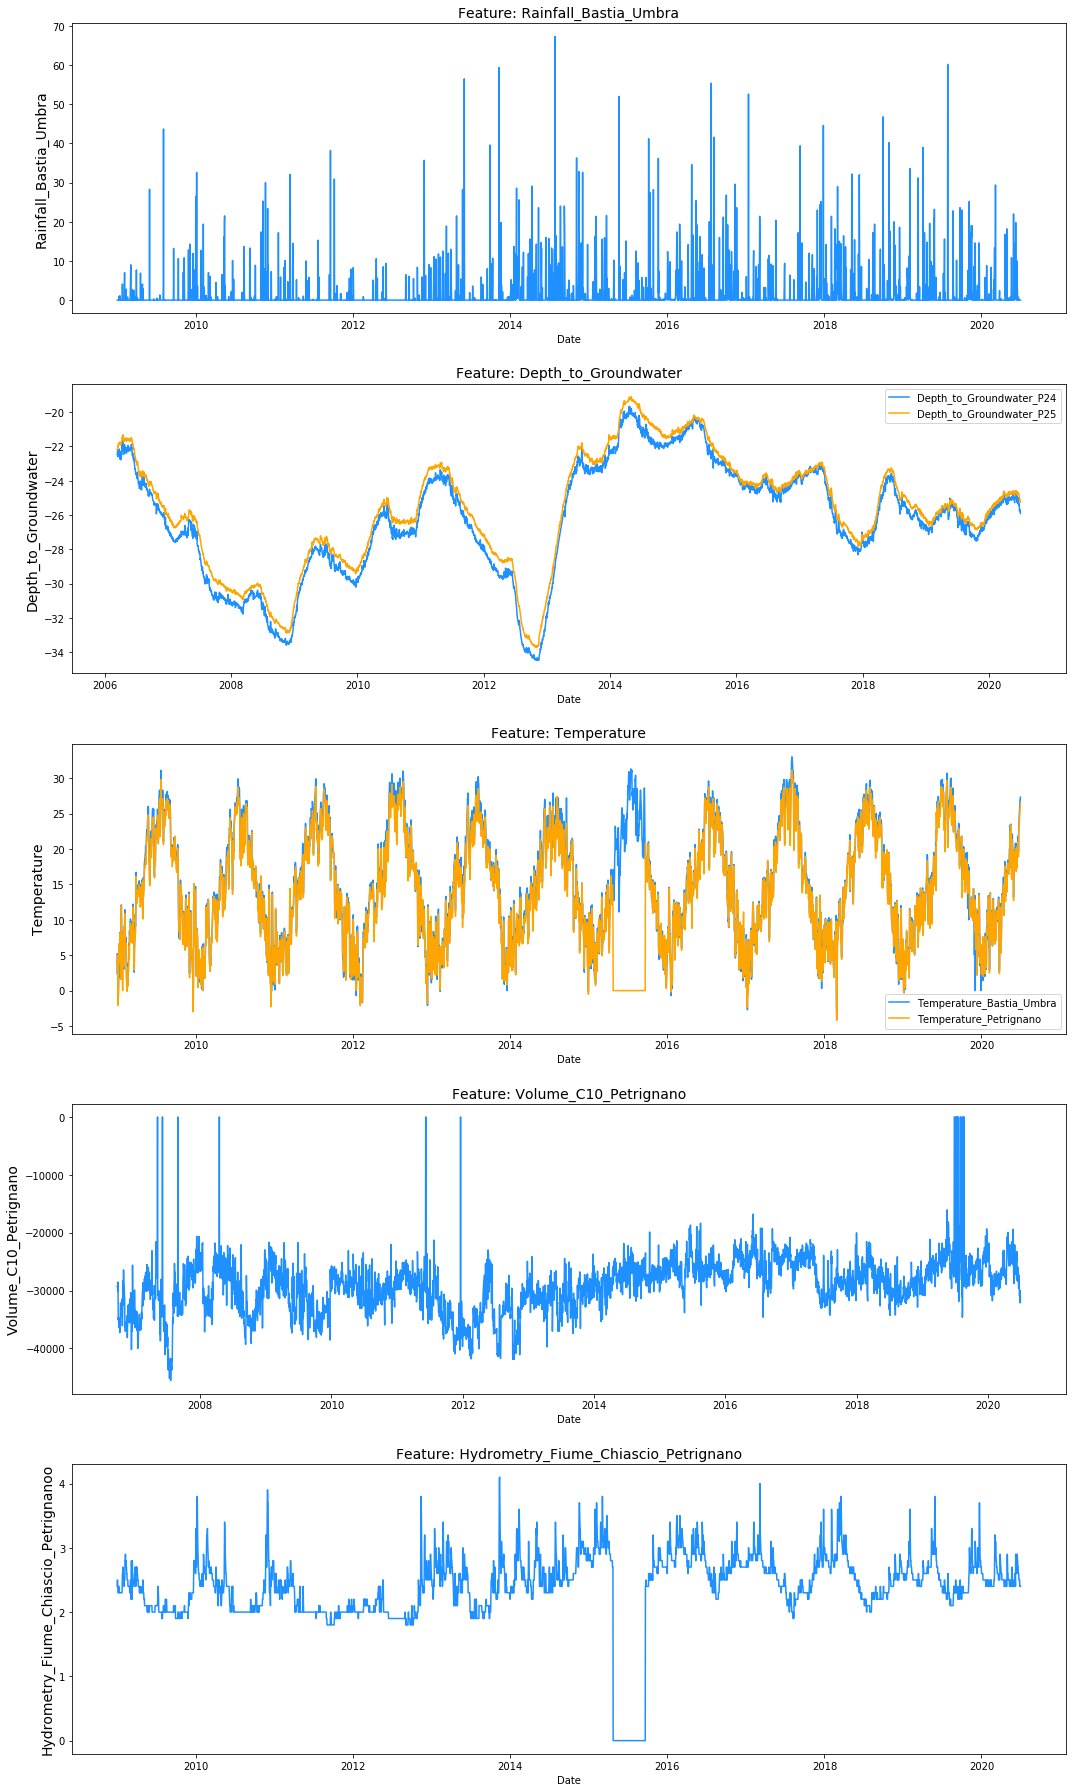

In [158]:
f, ax = plt.subplots(nrows=len(feature_col)-2, ncols=1, figsize=(15, 25))
    
sns.lineplot(x=df['Date'].where(df['Rainfall_Bastia_Umbra'].notnull()), y=df['Rainfall_Bastia_Umbra'].fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: {}'.format('Rainfall_Bastia_Umbra'), fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall_Bastia_Umbra', fontsize=14) 

sns.lineplot(x=df['Date'].where(df['Depth_to_Groundwater_P24'].notnull()), y=df['Depth_to_Groundwater_P24'].fillna(np.inf), ax=ax[1], color='dodgerblue',label='Depth_to_Groundwater_P24')
sns.lineplot(x=df['Date'].where(df['Depth_to_Groundwater_P25'].notnull()), y=df['Depth_to_Groundwater_P25'].fillna(np.inf), ax=ax[1], color='orange',label='Depth_to_Groundwater_P25')
ax[1].set_title('Feature: {}'.format('Depth_to_Groundwater'), fontsize=14)
ax[1].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

sns.lineplot(x=df['Date'].where(df['Temperature_Bastia_Umbra'].notnull()), y=df['Temperature_Bastia_Umbra'].fillna(np.inf), ax=ax[2], color='dodgerblue',label='Temperature_Bastia_Umbra')
sns.lineplot(x=df['Date'].where(df['Temperature_Petrignano'].notnull()), y=df['Temperature_Petrignano'].fillna(np.inf), ax=ax[2], color='orange',label='Temperature_Petrignano')
ax[2].set_title('Feature: {}'.format('Temperature'), fontsize=14)
ax[2].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df['Date'].where(df['Volume_C10_Petrignano'].notnull()), y=df['Volume_C10_Petrignano'].fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: {}'.format('Volume_C10_Petrignano'), fontsize=14)
ax[3].set_ylabel(ylabel='Volume_C10_Petrignano', fontsize=14)

sns.lineplot(x=df['Date'].where(df['Hydrometry_Fiume_Chiascio_Petrignano'].notnull()), y=df['Hydrometry_Fiume_Chiascio_Petrignano'].fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Feature: {}'.format('Hydrometry_Fiume_Chiascio_Petrignano'), fontsize=14)
ax[4].set_ylabel(ylabel='Hydrometry_Fiume_Chiascio_Petrignanoo', fontsize=14)

plt.tight_layout()
plt.show()

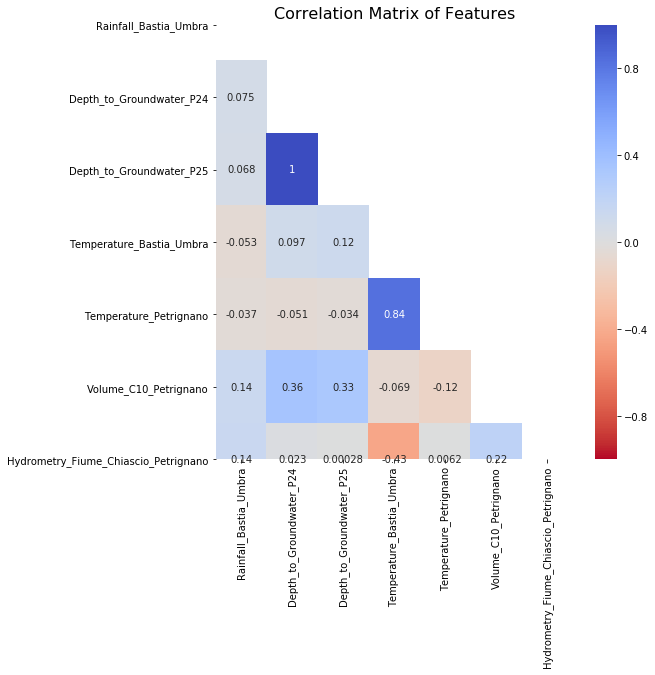

In [159]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

corrmat = df[feature_col].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax,mask=mask)
ax.set_title('Correlation Matrix of Features', fontsize=16)

plt.show()

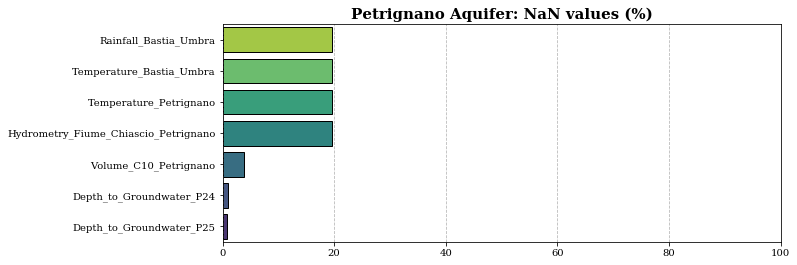

In [160]:
#Check missing values
NaN_values = (df[feature_col].isnull().sum() / len(df) * 100).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (10, 4))
plt.title('Petrignano Aquifer: NaN values (%)', size = 15, fontweight = 'bold', fontfamily = 'serif')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
sns.barplot(x = NaN_values, y = NaN_values.index, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(NaN_values.index))))
ax.set_xlim((0, 100))    
ax.set_xticklabels(range(0, 101, 20), fontfamily = 'serif')
ax.set_yticklabels(NaN_values.index, fontfamily = 'serif')
ax.grid(axis = 'x', linestyle = '--', alpha = 0.9)
plt.show()


In [161]:
# Reset date using rainfall data which has a shorter duration
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [162]:
# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']
targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [163]:
print('The earliest date: \t%s' %df['Date'].values[0])
print('The latest date: \t%s' %df['Date'].values[-1])
print(df.shape)

The earliest date: 	2009-01-01T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(4199, 6)


In [164]:
df = df.sort_values(by='Date')

df['Time_Interval'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [165]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

1 days    4198
Name: Time_Interval, dtype: int64


In [166]:
df.isna().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Drainage_Volume          1
River_Hydrometry         0
dtype: int64

(733408.0, 737606.0)

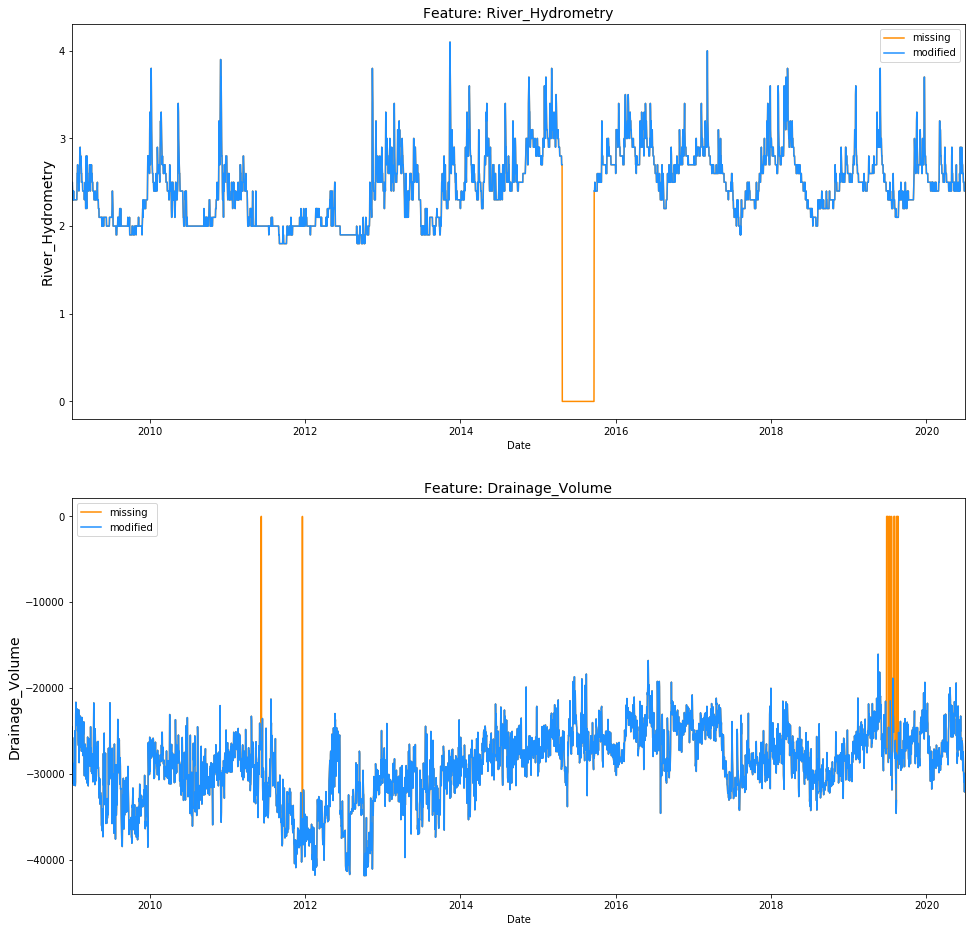

In [167]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

old_hydrometry = df['River_Hydrometry'].copy()
df['River_Hydrometry'] = df['River_Hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='missing')
sns.lineplot(x=df['Date'], y=df['River_Hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: River_Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='River_Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['Drainage_Volume'].copy()
df['Drainage_Volume'] = df['Drainage_Volume'].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_drainage, ax=ax[1], color='darkorange', label='missing')
sns.lineplot(x=df['Date'], y=df['Drainage_Volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage_Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage_Volume', fontsize=14)
ax[1].set_xlim([df['Date'].values[0], df['Date'].values[-1]])


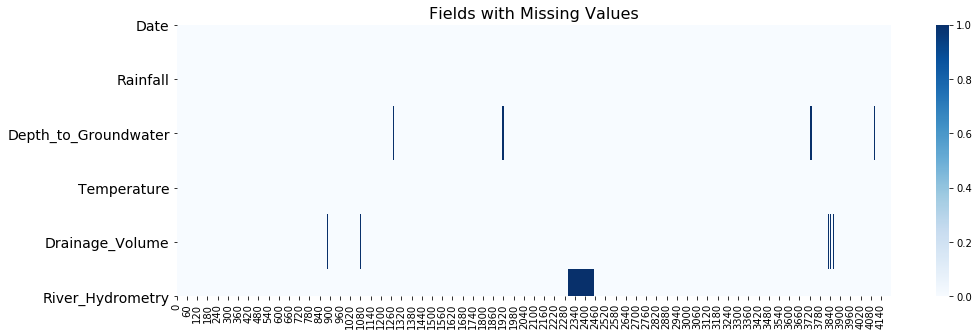

In [168]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
# for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

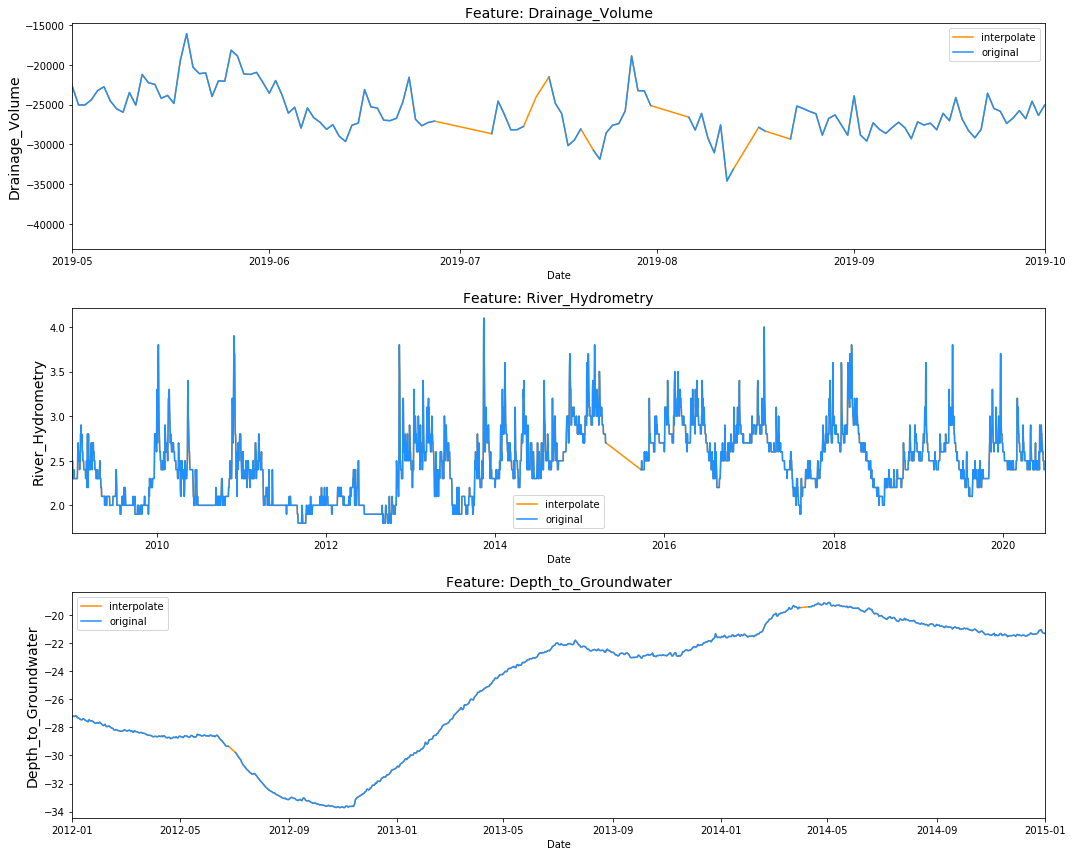

In [169]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.Date, y=df.Drainage_Volume.interpolate(), ax=ax[0], color='darkorange', label = 'interpolate')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title(f'Feature: Drainage_Volume', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage_Volume', fontsize=14)
ax[0].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

sns.lineplot(x=df.Date, y=df.River_Hydrometry.interpolate(), ax=ax[1], color='darkorange', label = 'interpolate')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Feature: River_Hydrometry', fontsize=14)
ax[1].set_ylabel(ylabel='River_Hydrometry', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.interpolate(), ax=ax[2], color='darkorange', label = 'interpolate')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'Feature: Depth_to_Groundwater', fontsize=14)
ax[2].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)
ax[2].set_xlim([date(2012, 1, 1), date(2015, 1, 1)])
# ax[2].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In [170]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

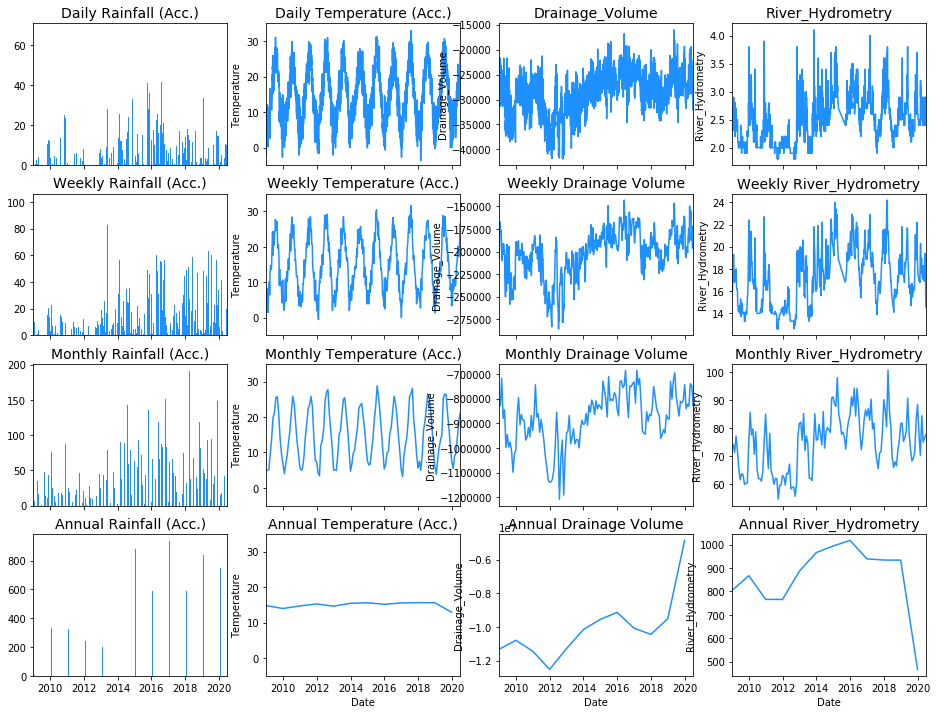

In [171]:
fig, ax = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(16,12))

ax[0, 0].bar(df.Date, df.Rainfall, width=5, color='dodgerblue')
ax[0, 0].set_title('Daily Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[1, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=10, color='dodgerblue')
ax[1, 0].set_title('Weekly Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('M', on='Date').sum().reset_index(drop=False)
ax[2, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=15, color='dodgerblue')
ax[2, 0].set_title('Monthly Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('12M', on='Date').sum().reset_index(drop=False)
ax[3, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=20, color='dodgerblue')
ax[3, 0].set_title('Annual Rainfall (Acc.)', fontsize=14)

for i in range(4):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(df.Date, df.Temperature, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date','Temperature']].resample('7D', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df.Date, resampled_df.Temperature, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date','Temperature']].resample('M', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df.Date, resampled_df.Temperature, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date','Temperature']].resample('365D', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df.Date, resampled_df.Temperature, color='dodgerblue', ax=ax[3, 1])
ax[3, 1].set_title('Annual Temperature (Acc.)', fontsize=14)

for i in range(4):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_ylim([-5, 35])

sns.lineplot(df['Date'], df['Drainage_Volume'], color='dodgerblue', ax=ax[0, 2])
ax[0, 2].set_title('Drainage_Volume', fontsize=14)

resampled_df = df[['Date','Drainage_Volume']].resample('7D', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df['Drainage_Volume'], color='dodgerblue', ax=ax[1, 2])
ax[1, 2].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['Date','Drainage_Volume']].resample('M', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df['Drainage_Volume'], color='dodgerblue', ax=ax[2, 2])
ax[2, 2].set_title('Monthly Drainage Volume', fontsize=14)

resampled_df = df[['Date','Drainage_Volume']].resample('365D', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df['Drainage_Volume'], color='dodgerblue', ax=ax[3, 2])
ax[3, 2].set_title('Annual Drainage Volume', fontsize=14)

for i in range(4):
    ax[i, 2].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
sns.lineplot(df['Date'], df['River_Hydrometry'], color='dodgerblue', ax=ax[0, 3])
ax[0, 3].set_title('River_Hydrometry', fontsize=14)

resampled_df = df[['Date','River_Hydrometry']].resample('7D', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df['River_Hydrometry'], color='dodgerblue', ax=ax[1, 3])
ax[1, 3].set_title('Weekly River_Hydrometry', fontsize=14)

resampled_df = df[['Date','River_Hydrometry']].resample('M', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df['River_Hydrometry'], color='dodgerblue', ax=ax[2, 3])
ax[2, 3].set_title('Monthly River_Hydrometry', fontsize=14)

resampled_df = df[['Date','River_Hydrometry']].resample('365D', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df['River_Hydrometry'], color='dodgerblue', ax=ax[3, 3])
ax[3, 3].set_title('Annual River_Hydrometry', fontsize=14)

for i in range(4):
    ax[i, 3].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

In [172]:
df_downsampled = df[['Date',
                     'Depth_to_Groundwater', 
                     'Temperature',
                     'Drainage_Volume', 
                     'River_Hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]

df = df_downsampled

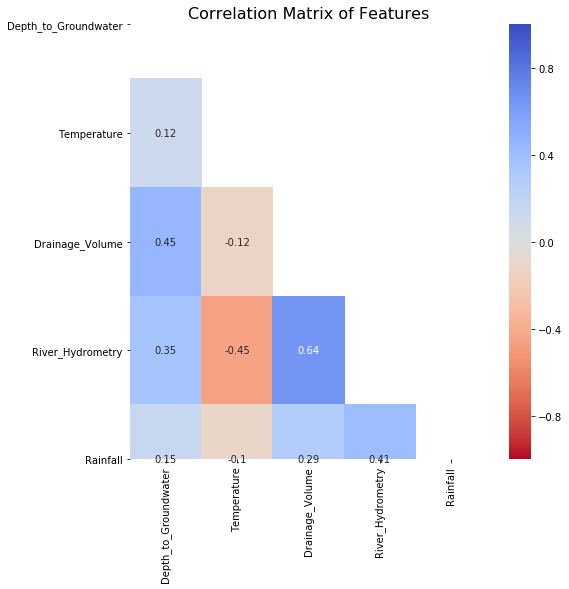

In [173]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

original_cols = ['Depth_to_Groundwater', 
                 'Temperature',
                 'Drainage_Volume', 'River_Hydrometry','Rainfall']

corrmat = df[original_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax, mask=mask)
ax.set_title('Correlation Matrix of Features', fontsize=16)

plt.show()

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Rainfall', 'Temperature', 'Drainage_Volume', 
    'River_Hydrometry', 'Depth_to_Groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq') # .set_index('Date')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

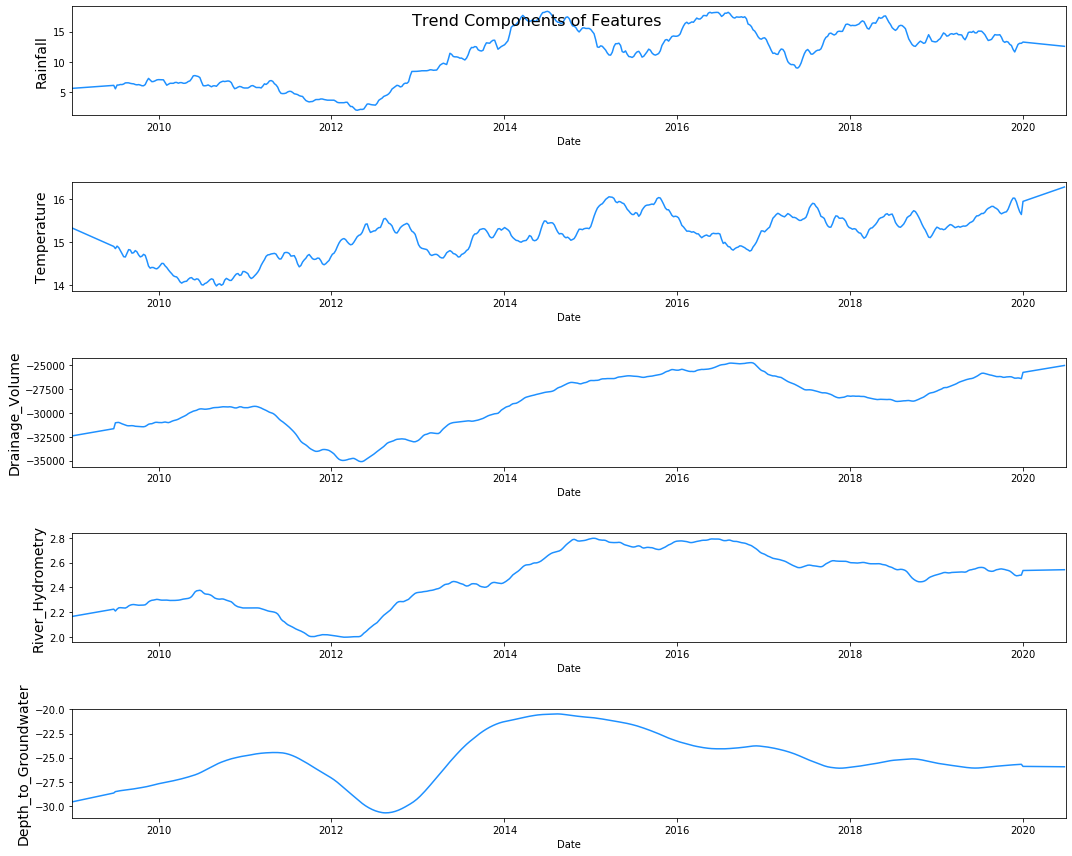

In [175]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Trend Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['Date'], y=df[column + '_trend'], ax=ax[i], color='dodgerblue')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

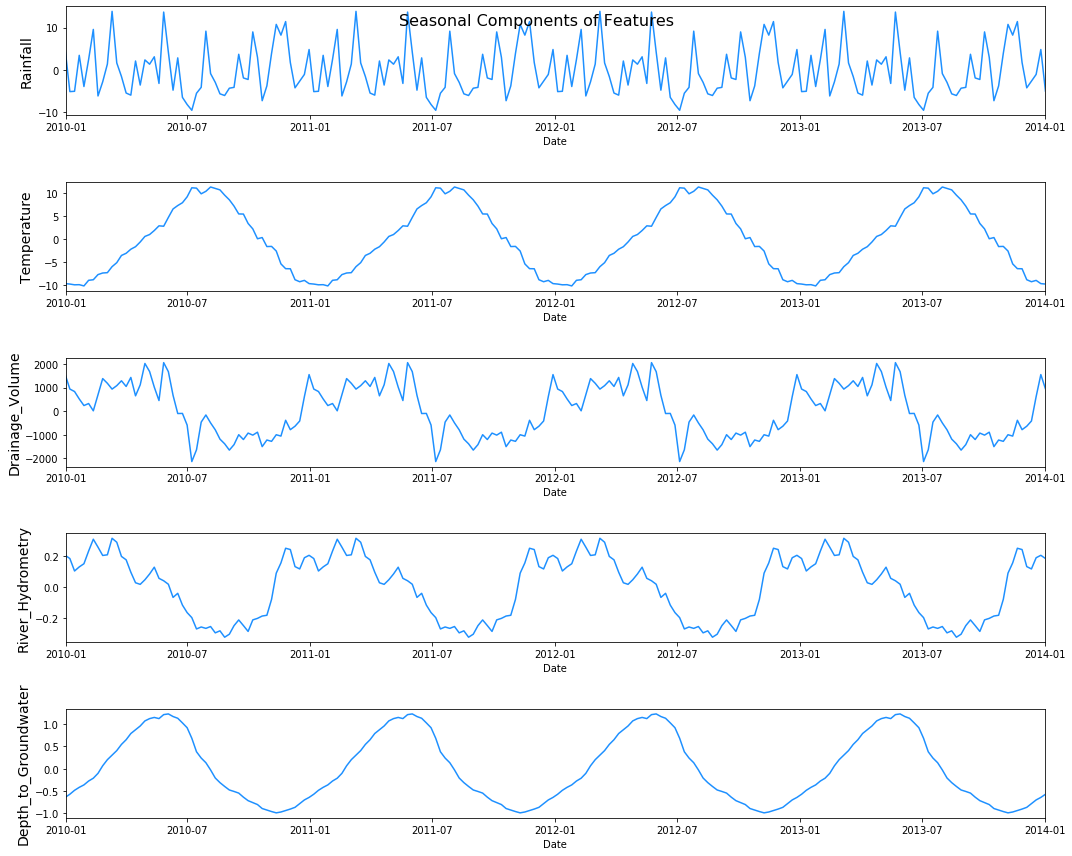

In [176]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['Date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2010, 1, 1), date(2014, 1, 1)])
    
plt.tight_layout()
plt.show()

In [177]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_shift_b_3m'] = df[f'{column}'].shift(-3 * weeks_in_month)
    df[f'{column}_shift_b_2m'] = df[f'{column}'].shift(-2 * weeks_in_month)
    df[f'{column}_shift_b_1m'] = df[f'{column}'].shift(-1 * weeks_in_month)
    df[f'{column}_shift_1m'] = df[f'{column}'].shift(1 * weeks_in_month)
    df[f'{column}_shift_2m'] = df[f'{column}'].shift(2 * weeks_in_month)
    df[f'{column}_shift_3m'] = df[f'{column}'].shift(3 * weeks_in_month)

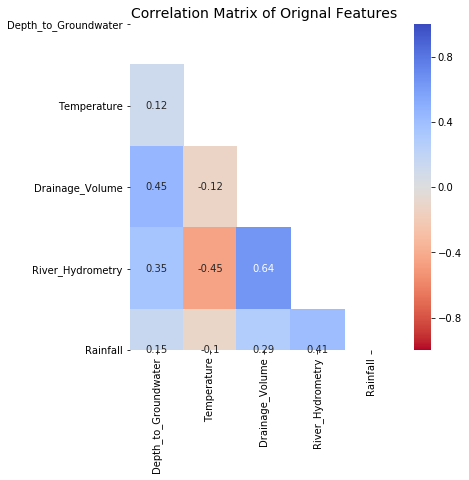

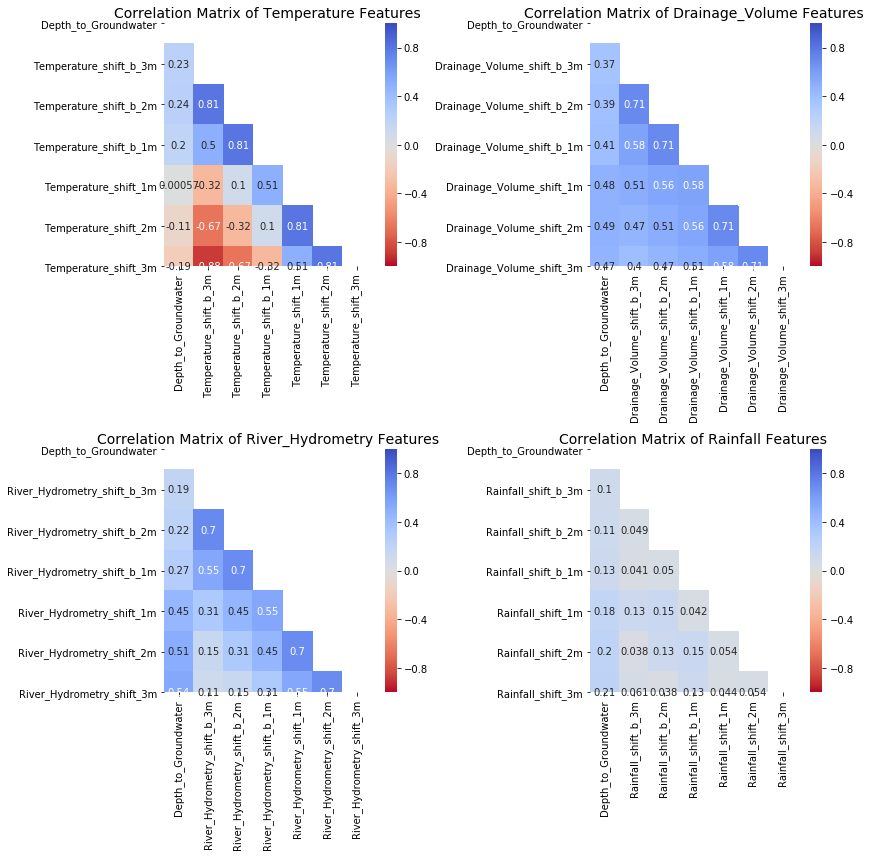

In [178]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

original_cols = ['Depth_to_Groundwater', 
                 'Temperature',
                 'Drainage_Volume', 'River_Hydrometry','Rainfall']

corrmat = df[original_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax, mask=mask)
ax.set_title('Correlation Matrix of Orignal Features', fontsize=14)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
shifted_cols = [
    'Depth_to_Groundwater',
    'Temperature_shift_b_3m',
    'Temperature_shift_b_2m',
    'Temperature_shift_b_1m',
    'Temperature_shift_1m',
    'Temperature_shift_2m',
    'Temperature_shift_3m']
corrmat = df[shifted_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0,0], mask=mask)
ax[0,0].set_title('Correlation Matrix of Temperature Features', fontsize=14)

shifted_cols = [
    'Depth_to_Groundwater',
    'Drainage_Volume_shift_b_3m',
    'Drainage_Volume_shift_b_2m',
    'Drainage_Volume_shift_b_1m', 
    'Drainage_Volume_shift_1m',
    'Drainage_Volume_shift_2m',
    'Drainage_Volume_shift_3m']
corrmat = df[shifted_cols].corr()
# mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0,1], mask=mask)
ax[0,1].set_title('Correlation Matrix of Drainage_Volume Features', fontsize=14)

shifted_cols = [
    'Depth_to_Groundwater',
    'River_Hydrometry_shift_b_3m',
    'River_Hydrometry_shift_b_2m',
    'River_Hydrometry_shift_b_1m', 
    'River_Hydrometry_shift_1m',
    'River_Hydrometry_shift_2m',
    'River_Hydrometry_shift_3m']
corrmat = df[shifted_cols].corr()

mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1,0], mask=mask)
ax[1,0].set_title('Correlation Matrix of River_Hydrometry Features', fontsize=14)

shifted_cols = [
    'Depth_to_Groundwater',
    'Rainfall_shift_b_3m',
    'Rainfall_shift_b_2m',
    'Rainfall_shift_b_1m', 
    'Rainfall_shift_1m',
    'Rainfall_shift_2m',
    'Rainfall_shift_3m',
]
corrmat = df[shifted_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1,1], mask=mask)
ax[1,1].set_title('Correlation Matrix of Rainfall Features', fontsize=14)



plt.tight_layout()
plt.show()


In [179]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_3m'] = df[f'{column}_seasonal'].shift(-3 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

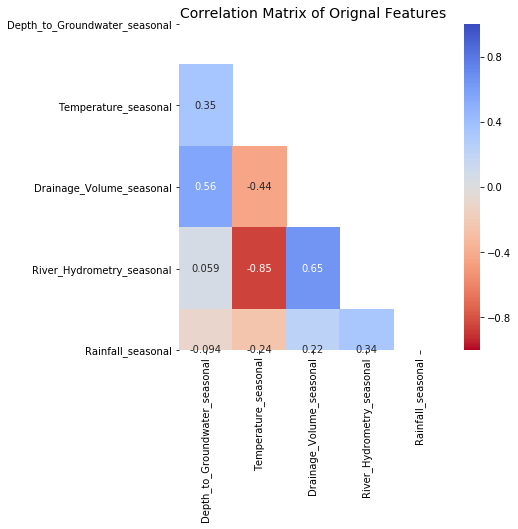

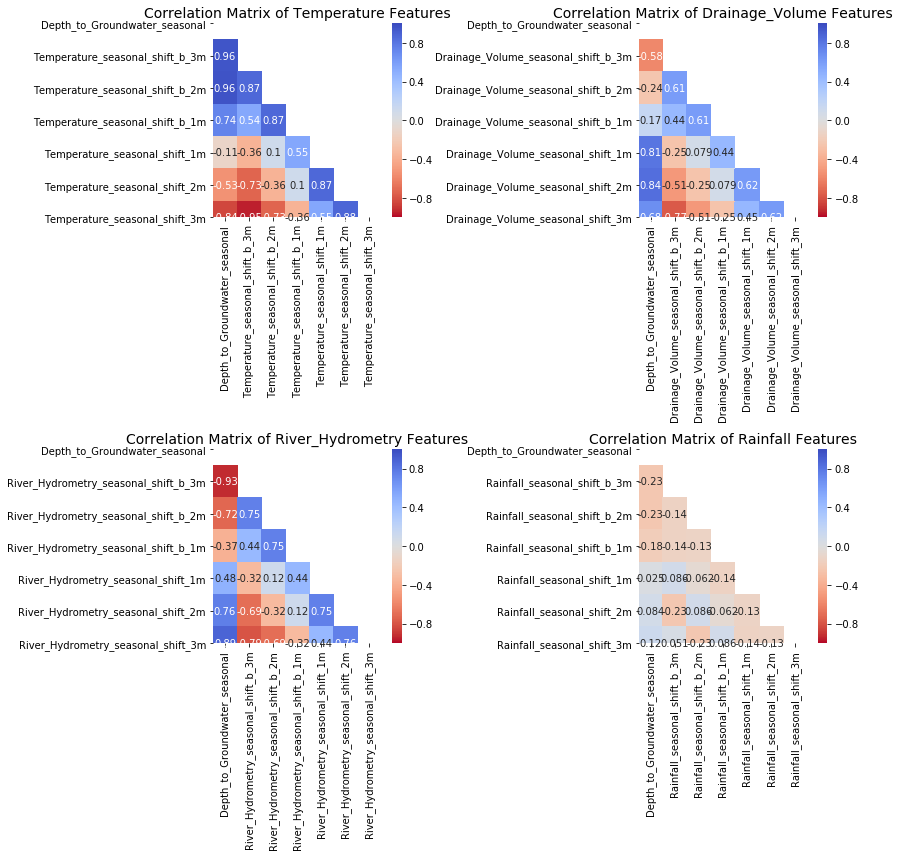

In [180]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

original_cols = ['Depth_to_Groundwater_seasonal', 
                 'Temperature_seasonal',
                 'Drainage_Volume_seasonal', 'River_Hydrometry_seasonal','Rainfall_seasonal']

corrmat = df[original_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax, mask=mask)
ax.set_title('Correlation Matrix of Orignal Features', fontsize=14)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
shifted_cols = [
    'Depth_to_Groundwater_seasonal',
    'Temperature_seasonal_shift_b_3m',
    'Temperature_seasonal_shift_b_2m',
    'Temperature_seasonal_shift_b_1m',
    'Temperature_seasonal_shift_1m',
    'Temperature_seasonal_shift_2m',
    'Temperature_seasonal_shift_3m']
corrmat = df[shifted_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0,0], mask=mask)
ax[0,0].set_title('Correlation Matrix of Temperature Features', fontsize=14)

shifted_cols = [
    'Depth_to_Groundwater_seasonal',
    'Drainage_Volume_seasonal_shift_b_3m',
    'Drainage_Volume_seasonal_shift_b_2m',
    'Drainage_Volume_seasonal_shift_b_1m', 
    'Drainage_Volume_seasonal_shift_1m',
    'Drainage_Volume_seasonal_shift_2m',
    'Drainage_Volume_seasonal_shift_3m']
corrmat = df[shifted_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0,1], mask=mask)
ax[0,1].set_title('Correlation Matrix of Drainage_Volume Features', fontsize=14)

shifted_cols = [
    'Depth_to_Groundwater_seasonal',
    'River_Hydrometry_seasonal_shift_b_3m',
    'River_Hydrometry_seasonal_shift_b_2m',
    'River_Hydrometry_seasonal_shift_b_1m', 
    'River_Hydrometry_seasonal_shift_1m',
    'River_Hydrometry_seasonal_shift_2m',
    'River_Hydrometry_seasonal_shift_3m']
corrmat = df[shifted_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1,0], mask=mask)
ax[1,0].set_title('Correlation Matrix of River_Hydrometry Features', fontsize=14)

shifted_cols = [
    'Depth_to_Groundwater_seasonal',
    'Rainfall_seasonal_shift_b_3m',
    'Rainfall_seasonal_shift_b_2m',
    'Rainfall_seasonal_shift_b_1m', 
    'Rainfall_seasonal_shift_1m',
    'Rainfall_seasonal_shift_2m',
    'Rainfall_seasonal_shift_3m',
]
corrmat = df[shifted_cols].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1,1], mask=mask)
ax[1,1].set_title('Correlation Matrix of Rainfall Features', fontsize=14)



plt.tight_layout()
plt.show()

In [181]:

#from prophet import Prophet
#
##prepare input data for model
##The input to Prophet is always a dataframe with two columns: ds and y. 
#
#feature_columns = [
#    'Rainfall',
#    'Temperature',
#    'Drainage_Volume',
#    'River_Hydrometry',
#]
#target_column = ['Depth_to_Groundwater']
#
#train_size = int(0.85 * len(df))
#
#pro_df = df[['Date'] + target_column + feature_columns].copy()
#pro_df.columns = ['ds', 'y'] + feature_columns
#
#train = pro_df.iloc[:train_size, :]
#train.head()


In [182]:
#
#x_train, y_train = pd.DataFrame(pro_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(pro_df.iloc[:train_size, 1])
#x_test, y_test = pd.DataFrame(pro_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(pro_df.iloc[train_size:, 1])

In [183]:
#
## Train the model
#model = Prophet()
#model.add_regressor('Rainfall')
#model.add_regressor('Temperature')
#model.add_regressor('Drainage_Volume')
#model.add_regressor('River_Hydrometry')
#
#model.fit(train)
#
## x_valid = model.make_future_dataframe(periods=test_size, freq='w')
#
## Predict on test set
#y_pred = model.predict(x_test)
#
## Calcuate metrics
#score_mae = mean_absolute_error(y_test, y_pred['yhat'])
#score_rmse = math.sqrt(mean_squared_error(y_test, y_pred['yhat']))
#
#print('MAE: {}'.format(score_mae))
#print('RMSE: {}'.format(score_rmse))

In [184]:
#
## Plot the forecast
#f, ax = plt.subplots(1, figsize=(8,4))
#
#model.plot(y_pred, ax=ax)
#sns.lineplot(x=x_test['ds'], y=y_test['y'], ax=ax, color='orange', label='Ground truth') 
#sns.lineplot(x=x_train['ds'], y=y_train['y'], ax=ax, color='black', label='Train') 
#
#ax.set_title(f'Prophet Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#ax.set_xlabel(xlabel='Date', fontsize=14)
#ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
#
#plt.show()

# XGBOOST Regressor

In [185]:
from xgboost import XGBRegressor

In [186]:
y = df['Depth_to_Groundwater']
x_shift = df[['Temperature_shift_b_2m','Drainage_Volume_shift_1m','Rainfall_shift_3m','River_Hydrometry_shift_3m']].copy()
x_org = df[['Temperature','Drainage_Volume','Rainfall','River_Hydrometry']].copy()

train_size = 0.85
test_size = 1- train_size
x_org_train, x_org_test, y_org_train, y_org_test = train_test_split(x_org, y, train_size = train_size, shuffle = False)
x_shift_train, x_shift_test, y_shift_train, y_shift_test = train_test_split(x_shift, y, train_size = train_size, shuffle = False)

In [187]:
params = {'n_estimators': 1000,
          'max_depth': 5,
          'subsample': 1,
          #'learning_rate': 0.04,
          'random_state': 0}

model = XGBRegressor(**params)

In [188]:
# Orginal data
valid_size=int(len(x_org_train)*0.85)
x_org_valid=x_org_train.iloc[valid_size:,:]
y_org_valid=y_org_train.iloc[valid_size:]
model_org = model.fit(x_org_train.iloc[:valid_size,:], y_org_train.iloc[:valid_size],
                      early_stopping_rounds=5, 
                      # Early_stopping offers a way to automatically find the ideal value for n_estimators. 
                      #Early stopping causes the model to stop iterating when the validation score stops improving.
                      #Early stopping will determine the appropriate number of trees automatically.
                      eval_set=[(x_org_valid,y_org_valid)],
                      verbose=False)
# Predict on test set
y_org_pred = model.predict(x_org_test)

# Calcuate metrics
score_mae_org = mean_absolute_error(y_org_test, y_org_pred)
score_rmse_org = math.sqrt(mean_squared_error(y_org_test, y_org_pred))

print('MAE value: %.2f' %score_mae_org)
print('RMSE value: %.2f' %score_rmse_org)
print('Prediction: %.3f' % y_org_pred[0])

MAE value: 1.92
RMSE value: 2.27
Prediction: -26.449


In [189]:
#
#params = {'n_estimators': 1000,
#          'max_depth': 5,
#          'subsample': 1,
#          #'learning_rate': 0.04,
#          'random_state': 0}
#
#model = XGBRegressor(**params)

In [190]:
valid_size=int(len(x_shift_train)*0.85)
x_shift_valid=x_shift_train.iloc[valid_size:,:]
y_shift_valid=y_shift_train.iloc[valid_size:]

model_shift =model.fit(x_shift_train.iloc[:valid_size,:], y_shift_train.iloc[:valid_size],
                       early_stopping_rounds=5, 
                       eval_set=[(x_shift_valid,y_shift_valid)],
                       verbose=False)
# Predict on test set
y_shift_pred = model.predict(x_shift_test)

# Calcuate metrics
score_mae_shift = mean_absolute_error(y_shift_test, y_shift_pred)
score_rmse_shift = math.sqrt(mean_squared_error(y_shift_test, y_shift_pred))

print('MAE value: %.2f' %score_mae_shift)
print('RMSE value: %.2f' %score_rmse_shift)
print('Prediction: %.3f' % y_shift_pred[0])

MAE value: 2.66
RMSE value: 2.91
Prediction: -24.924


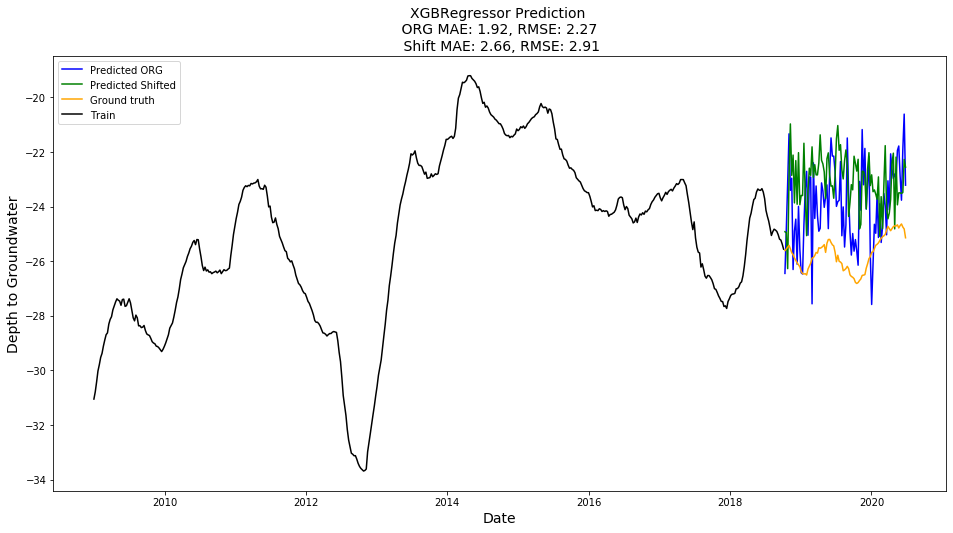

In [191]:
# Plot the forecast
f, ax = plt.subplots(1, figsize=(16,8))

sns.lineplot(x=df['Date'].iloc[int(train_size*len(df)):], y=y_org_pred, ax=ax, color='blue', label='Predicted ORG') 
sns.lineplot(x=df['Date'].iloc[int(train_size*len(df)):], y=y_shift_pred, ax=ax, color='green', label='Predicted Shifted') 

sns.lineplot(x=df['Date'].iloc[int(train_size*len(df)):], y=y_org_test, ax=ax, color='orange', label='Ground truth') 
sns.lineplot(x=df['Date'].iloc[:int(train_size*len(df))], y=y_org_train, ax=ax, color='black', label='Train') 

ax.set_title(f'XGBRegressor Prediction \n ORG MAE: {score_mae_org:.2f}, RMSE: {score_rmse_org:.2f} \n Shift MAE: {score_mae_shift:.2f}, RMSE: {score_rmse_shift:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

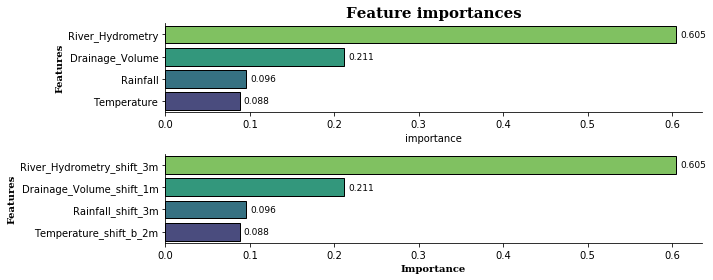

In [192]:
bias = 0.02
imp_org = pd.DataFrame({'importance': model_org.feature_importances_,
                'features': x_org_train.columns}).sort_values('importance',ascending = False)
imp_shift = pd.DataFrame({'importance': model_shift.feature_importances_,
                'features': x_shift_train.columns}).sort_values('importance',ascending = False)

fig, ax = plt.subplots(nrows=2, ncols=1,figsize = (10, 4))
ax[0].set_title('Feature importances', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.barplot(x = imp_org.importance, y = imp_org.features, edgecolor = 'black',
        palette = reversed(sns.color_palette("viridis", len(imp_org.features))),ax=ax[0])

for i in ['top', 'right']:
    ax[0].spines[i].set_visible(None)

rects = ax[0].patches
labels = imp_org.importance
for rect, label in zip(rects, labels):
    x_value = rect.get_width() + bias
    y_value = rect.get_y() + rect.get_height() / 2
    ax[0].text(x_value, y_value, round(label, 3), fontsize = 9, color = 'black',
             ha = 'center', va = 'center')
ax[0].set_ylabel('Features', fontweight = 'bold', fontfamily = 'serif')


sns.barplot(x = imp_shift.importance, y = imp_shift.features, edgecolor = 'black',
        palette = reversed(sns.color_palette("viridis", len(imp_org.features))),ax=ax[1])

for i in ['top', 'right']:
    ax[1].spines[i].set_visible(None)

rects = ax[1].patches
labels = imp_shift.importance
for rect, label in zip(rects, labels):
    x_value = rect.get_width() + bias
    y_value = rect.get_y() + rect.get_height() / 2
    ax[1].text(x_value, y_value, round(label, 3), fontsize = 9, color = 'black',
             ha = 'center', va = 'center')
ax[1].set_ylabel('Features', fontweight = 'bold', fontfamily = 'serif')
ax[1].set_xlabel('Importance', fontweight = 'bold', fontfamily = 'serif')

plt.tight_layout()
plt.show()


# LSTM

In [193]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler

In [194]:
data = df.filter(['Temperature','Drainage_Volume','Rainfall','River_Hydrometry','Depth_to_Groundwater'])
print(data.columns)
# data = df.filter(['Depth_to_Groundwater'])
#Convert the dataframe to a numpy array
dataset = data.values.astype('float32')

Index(['Temperature', 'Drainage_Volume', 'Rainfall', 'River_Hydrometry',
       'Depth_to_Groundwater'],
      dtype='object')


In [195]:
# Defines the rolling window
look_back = 30
train_size=int(0.7*len(dataset))
val_size=int(0.85*len(dataset))

# Split into train and test sets
train, val, test = dataset[:train_size-look_back,:],dataset[train_size-look_back:val_size-look_back,:],dataset[val_size-look_back:,:]
# print(train.shape,val.shape,test.shape)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, :]
        X.append(a)
        Y.append(dataset[i, -1])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

# scaler = StandardScaler()
# transformer = scaler.fit_transform(df)
scaler = MinMaxScaler(feature_range=(-1, 0))

x_train_scaled = scaler.fit_transform(np.reshape(x_train,(360,look_back*5)))
x_val_scaled = scaler.fit_transform(np.reshape(x_val,(60,look_back*5)))
x_test_scaled = scaler.fit_transform(np.reshape(x_test,(90,look_back*5)))

x_train_scaled = np.reshape(x_train_scaled,(360,look_back,5))
x_val_scaled = np.reshape(x_val_scaled,(60,look_back,5))
x_test_scaled = np.reshape(x_test_scaled,(90,look_back,5))

# input x has 3D structure [samples, time steps, features]
print(x_train_scaled.shape,y_train.shape,x_val_scaled.shape,y_val.shape,x_test_scaled.shape,y_test.shape)

(360, 30, 5) (360,) (60, 30, 5) (60,) (90, 30, 5) (90,)
(360, 30, 5) (360,) (60, 30, 5) (60,) (90, 30, 5) (90,)


In [196]:
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = scaler.fit_transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = scaler.fit_transform(y_test.reshape(-1, 1)).flatten()

In [197]:
x_train.shape[2]

5

In [198]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import callbacks

#Build the LSTM model
model = Sequential()
#input_sahep=(time steps, features)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
# early_stopping = callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model
history = model.fit(x_train_scaled, y_train_scaled, batch_size=8, epochs=30, validation_data=(x_val_scaled, y_val_scaled), verbose=2, shuffle=False)
#                  callbacks=[early_stopping])

model.summary()

Train on 360 samples, validate on 60 samples
Epoch 1/30
360/360 - 1s - loss: 0.0949 - val_loss: 0.2837 - 1s/epoch - 4ms/sample
Epoch 2/30
360/360 - 1s - loss: 0.0636 - val_loss: 0.2021 - 742ms/epoch - 2ms/sample
Epoch 3/30
360/360 - 1s - loss: 0.0417 - val_loss: 0.1937 - 726ms/epoch - 2ms/sample
Epoch 4/30
360/360 - 1s - loss: 0.0351 - val_loss: 0.1698 - 711ms/epoch - 2ms/sample
Epoch 5/30
360/360 - 1s - loss: 0.0331 - val_loss: 0.1354 - 711ms/epoch - 2ms/sample
Epoch 6/30
360/360 - 1s - loss: 0.0189 - val_loss: 0.0973 - 709ms/epoch - 2ms/sample
Epoch 7/30
360/360 - 1s - loss: 0.0125 - val_loss: 0.0727 - 639ms/epoch - 2ms/sample
Epoch 8/30
360/360 - 1s - loss: 0.0087 - val_loss: 0.0692 - 736ms/epoch - 2ms/sample
Epoch 9/30
360/360 - 1s - loss: 0.0083 - val_loss: 0.0603 - 784ms/epoch - 2ms/sample
Epoch 10/30
360/360 - 1s - loss: 0.0072 - val_loss: 0.0507 - 788ms/epoch - 2ms/sample
Epoch 11/30
360/360 - 1s - loss: 0.0058 - val_loss: 0.0465 - 765ms/epoch - 2ms/sample
Epoch 12/30
360/360 -

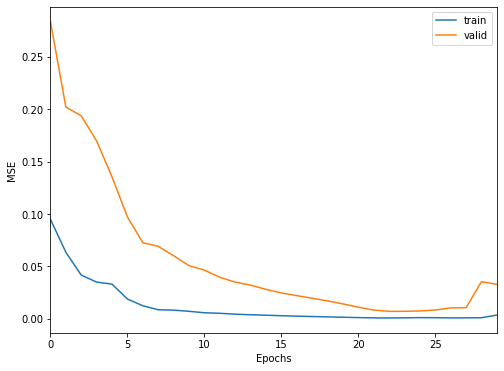

In [199]:
# plot history
f, ax = plt.subplots(1,figsize = (8, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlim([0,29])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [200]:
## predict with the model
print(x_test_scaled.shape)
test_predict = model.predict(x_test_scaled)

(90, 30, 5)


In [201]:
inv_test_predict = scaler.inverse_transform(test_predict)[:,0]
inv_test_predict.shape

(90,)

In [202]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, inv_test_predict))
mae = mean_absolute_error(y_test, inv_test_predict)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.372
Test MAE: 0.301


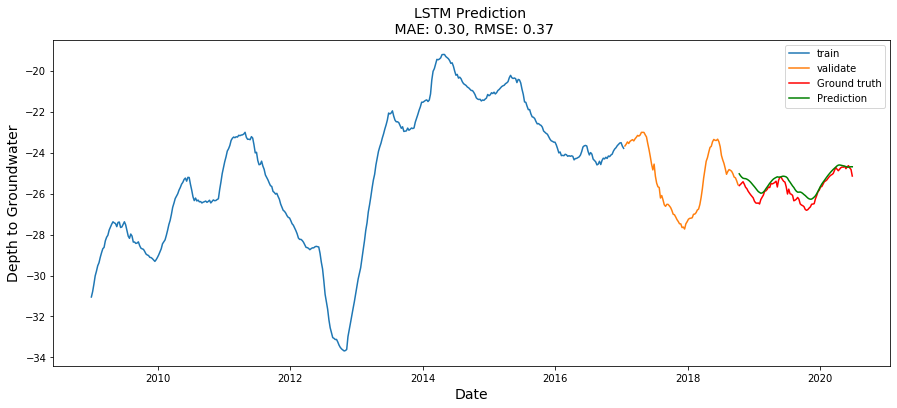

In [207]:
x_train_ticks = df['Date'].iloc[:train_size]
y_train = df['Depth_to_Groundwater'].iloc[:train_size]
x_val_ticks = df['Date'].iloc[train_size:val_size]
y_val = df['Depth_to_Groundwater'].iloc[train_size:val_size]
x_test_ticks = df['Date'].iloc[val_size:]
y_test = df['Depth_to_Groundwater'].iloc[val_size:]


# Plot the forecast
f, ax = plt.subplots(1,figsize=(15,6))

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='train') #navajowhite
sns.lineplot(x=x_val_ticks, y=y_val, ax=ax, label='validate') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test, ax=ax, color='red', label='Ground truth') #navajowhite
sns.lineplot(x=x_test_ticks, y=inv_test_predict, ax=ax, color='green', label='Prediction') #navajowhite

ax.set_title(f'LSTM Prediction \n MAE: {mae:.2f}, RMSE: {rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()


In [209]:
import shap
print(shap.__version__)

0.40.0


In [210]:
explainer = shap.DeepExplainer(model, x_train_scaled)
shap_values = explainer.shap_values(x_test_scaled)


In [211]:
# init the JS visualization code
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][:][:][:-1].sum(axis=1), ['Temperature','Drainage_Volume','Rainfall','River_Hydrometry'])